In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Read the CSV file
data = pd.read_csv('C:/Users/sharm/Downloads/airbnb.csv')



In [3]:
#pip install geopandas


In [4]:
#pip install plotly pandas


In [5]:
#pip install plotly

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Explore the data
# Display the first few rows
print(data.head())



                             id_visitor                        id_session  \
0  ed1329a6-064d-47e9-93bc-93f5a50822df  a8dfb8ed5aa79e00ff14b2da297c9778   
1  ed1329a6-064d-47e9-93bc-93f5a50822df  950277daef16f86dc2c05d2b212eea81   
2  ed1329a6-064d-47e9-93bc-93f5a50822df  ee4e2f99dd0c0bef2d40e4bdf880c862   
3  ed1329a6-064d-47e9-93bc-93f5a50822df  59fbde7b5d35403116c461fa7fc1ab6e   
4  ed1329a6-064d-47e9-93bc-93f5a50822df  ec8972a3c7256ea4dcba61ee2bd9e3a8   

   dim_session_number                                     dim_user_agent  \
0                  83                            Airbnb/6.0 iPhone/8.1.2   
1                  84  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
2                  85  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
3                  86  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
4                  87  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

  dim_device_app_combo          ds               ts_min               ts_max  \


In [8]:
# Get the summary statistics
print(data.describe())


       dim_session_number   did_search  sent_message  sent_booking_request  \
count         7756.000000  7756.000000   7756.000000           7756.000000   
mean            98.091671     0.159360      0.164905              0.018695   
std            131.533939     0.366036      0.371118              0.135455   
min              1.000000     0.000000      0.000000              0.000000   
25%             11.000000     0.000000      0.000000              0.000000   
50%             46.000000     0.000000      0.000000              0.000000   
75%            128.000000     0.000000      0.000000              0.000000   
max            702.000000     1.000000      1.000000              1.000000   

       next_dim_session_number  next_did_search  next_sent_message  \
count              7126.000000      7126.000000        7126.000000   
mean                106.675414         0.145804           0.175554   
std                 133.879600         0.352934           0.380467   
min              

In [9]:
# Check the data types of columns
print(data.dtypes)


id_visitor                    object
id_session                    object
dim_session_number             int64
dim_user_agent                object
dim_device_app_combo          object
ds                            object
ts_min                        object
ts_max                        object
did_search                     int64
sent_message                   int64
sent_booking_request           int64
next_id_session               object
next_dim_session_number      float64
next_dim_user_agent           object
next_dim_device_app_combo     object
next_ds                       object
next_ts_min                   object
next_ts_max                   object
next_did_search              float64
next_sent_message            float64
next_sent_booking_request    float64
dtype: object


In [10]:
# Check the number of rows and columns
print(data.shape)


(7756, 21)


In [11]:
# Check for missing values
print(data.isnull().sum())


id_visitor                     0
id_session                     0
dim_session_number             0
dim_user_agent               219
dim_device_app_combo           0
ds                             0
ts_min                         0
ts_max                         0
did_search                     0
sent_message                   0
sent_booking_request           0
next_id_session              630
next_dim_session_number      630
next_dim_user_agent          829
next_dim_device_app_combo    630
next_ds                      630
next_ts_min                  630
next_ts_max                  630
next_did_search              630
next_sent_message            630
next_sent_booking_request    630
dtype: int64


In [12]:
total_null_values = data.isnull().sum().sum()
print("Total sum of null values in the records:", total_null_values)


Total sum of null values in the records: 6718


In [13]:
column_count = len(data.columns)
column_names = data.columns.tolist()

print("Column names:")
for name in column_names:
    print("- " + name)
print("Total column count:", column_count)

Column names:
- id_visitor
- id_session
- dim_session_number
- dim_user_agent
- dim_device_app_combo
- ds
- ts_min
- ts_max
- did_search
- sent_message
- sent_booking_request
- next_id_session
- next_dim_session_number
- next_dim_user_agent
- next_dim_device_app_combo
- next_ds
- next_ts_min
- next_ts_max
- next_did_search
- next_sent_message
- next_sent_booking_request
Total column count: 21


In [14]:
# Analyzing session patterns (dim_session_number)
session_counts = data["dim_session_number"].value_counts()
print("Session Patterns:")
print(session_counts)



Session Patterns:
1      630
2      264
3      194
4      160
5      136
      ... 
649      1
650      1
651      1
652      1
432      1
Name: dim_session_number, Length: 702, dtype: int64


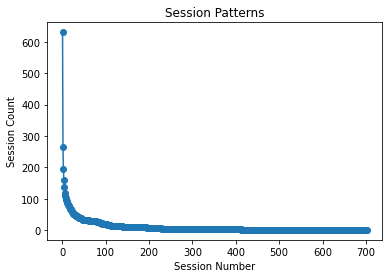

In [15]:
#Line Plot
# Sort the session counts by session number
sorted_counts = session_counts.sort_index()

# Create the line plot
plt.plot(sorted_counts.index, sorted_counts.values, marker='o')

# Set plot labels and title
plt.xlabel("Session Number")
plt.ylabel("Session Count")
plt.title("Session Patterns")

# Display the plot
plt.show()


In [16]:
# User agent/device usage (dim_user_agent, dim_device_app_combo)
user_agent_counts = data["dim_user_agent"].value_counts()
print("\nUser Agent Usage:")
print(user_agent_counts)




User Agent Usage:
Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201                                                                                                                                                  292
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                                                                                                                                                                     241
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                                                                                                                                            225
Airbnb/4.2.0 iPhone/7.1.1                                                                                                                                                                                

C:\Users\sharm\AppData\Local\Temp\ipykernel_21076\436077977.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing


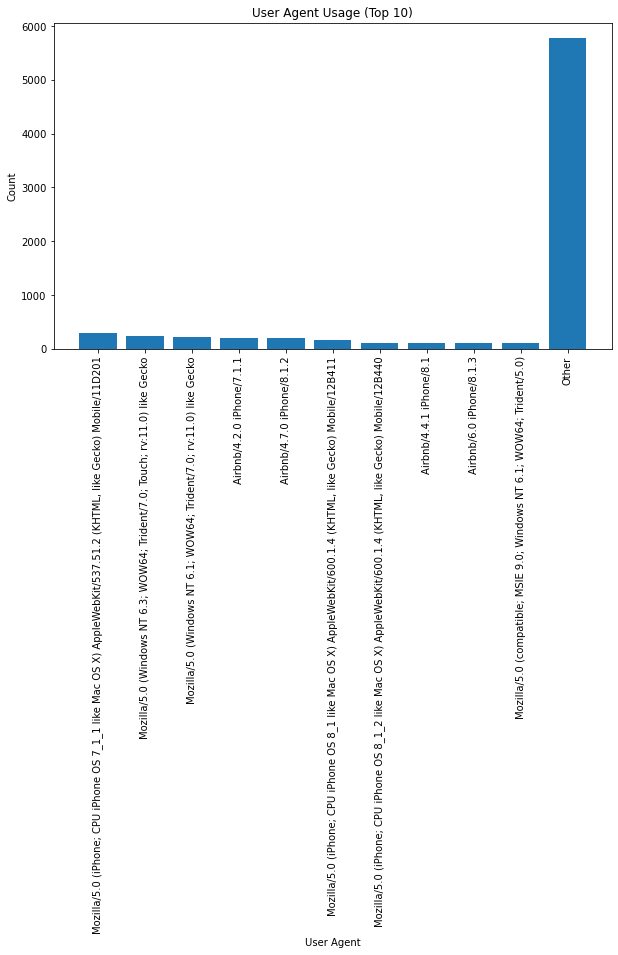

In [17]:
# Sort user agents by count in descending order
sorted_user_agents = user_agent_counts.sort_values(ascending=False)

# Get the top N user agents for visualization
top_n = 10
top_user_agents = sorted_user_agents[:top_n]
other_count = sorted_user_agents[top_n:].sum()
top_user_agents['Other'] = other_count

# Plotting grouped bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(top_user_agents))
plt.bar(x, top_user_agents.values)
plt.xticks(x, top_user_agents.index, rotation=90)
plt.xlabel("User Agent")
plt.ylabel("Count")
plt.title("User Agent Usage (Top {})".format(top_n))
plt.tight_layout()  # Adjust spacing
plt.show()

In [18]:
device_app_counts = data["dim_device_app_combo"].value_counts()
print("\nDevice/App Usage:")
print(device_app_counts)


Device/App Usage:
iPhone - iOS                2130
Desktop - Chrome            1181
iPhone - Web                 944
Android Phone - Android      451
Desktop - Safari             443
iPhone - Moweb               429
Desktop - IE                 429
iPad - Web                   413
Desktop - Firefox            327
Android Tablet - Web         299
Other - Other                267
Unknown - Moweb              122
iPad - iOS                   121
Android Phone - Web          112
Android Phone - Moweb         72
Android Tablet - Android      14
Android Tablet - Moweb         2
Name: dim_device_app_combo, dtype: int64


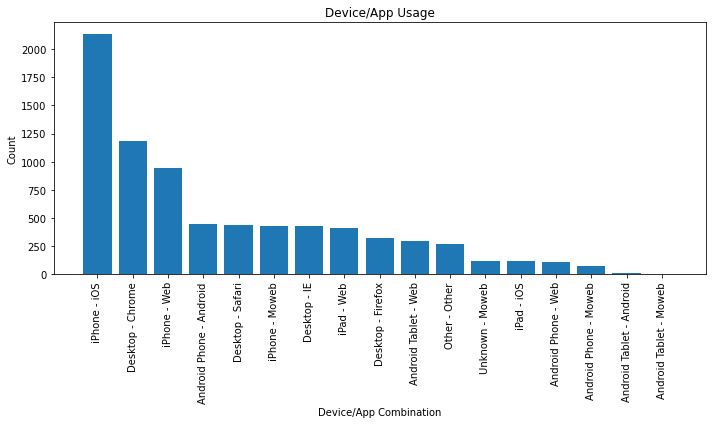

In [19]:
# Plotting bar plot
plt.figure(figsize=(10, 6))
plt.bar(device_app_counts.index, device_app_counts.values)
plt.xlabel("Device/App Combination")
plt.ylabel("Count")
plt.title("Device/App Usage")
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust spacing
plt.show()

In [20]:
# Activity frequencies (did_search, sent_message, sent_booking_request)
activity_counts = data[["did_search", "sent_message", "sent_booking_request"]].sum()
print("\nActivity Frequencies:")
print(activity_counts)


Activity Frequencies:
did_search              1236
sent_message            1279
sent_booking_request     145
dtype: int64


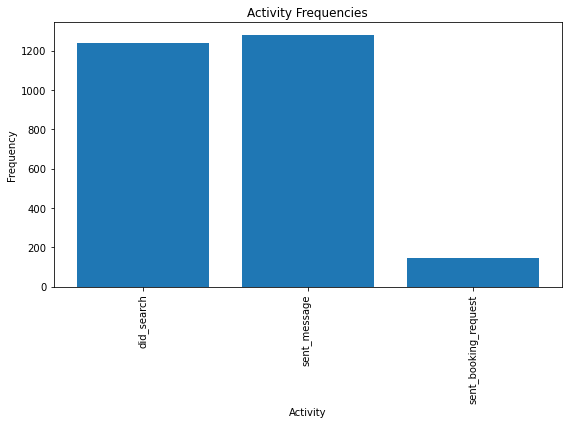

In [21]:
# Activity frequencies - Bar plot
activity_counts = data[["did_search", "sent_message", "sent_booking_request"]].sum()

# Plotting bar plot
plt.figure(figsize=(8, 6))
plt.bar(activity_counts.index, activity_counts.values)
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.title("Activity Frequencies")
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust spacing
plt.show()

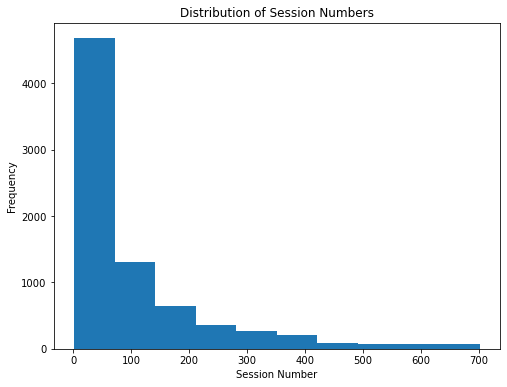

In [22]:
# Histogram for 'dim_session_number'
plt.figure(figsize=(8, 6))
plt.hist(data['dim_session_number'], bins=10)
plt.xlabel('Session Number')
plt.ylabel('Frequency')
plt.title('Distribution of Session Numbers')
plt.show()


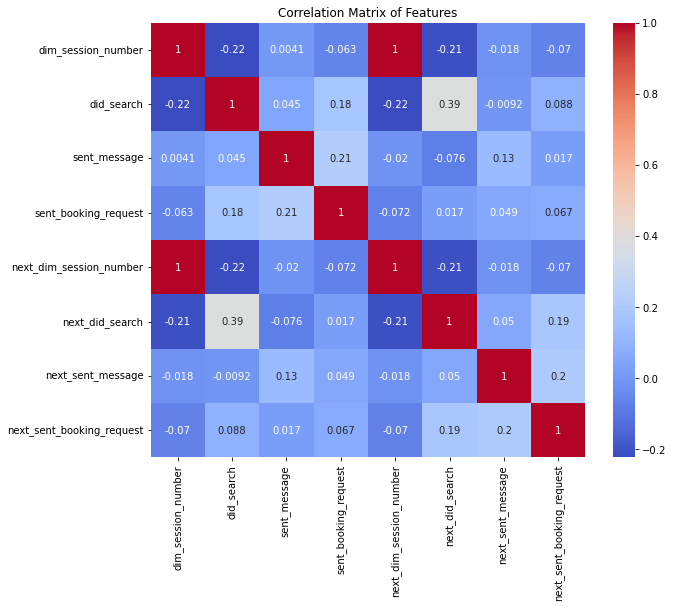

In [23]:
# Select the relevant columns for correlation analysis
columns = [
    'dim_session_number', 'ts_min', 'ts_max', 'did_search',
    'sent_message', 'sent_booking_request', 'next_dim_session_number',
    'next_ts_min', 'next_ts_max', 'next_did_search',
    'next_sent_message', 'next_sent_booking_request'
]

# Create a correlation matrix
correlation_matrix = data[columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [24]:
#Model Training

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Select the relevant columns from the dataset
columns = [
    'dim_session_number', 'dim_user_agent', 'dim_device_app_combo',
    'did_search', 'sent_message', 'sent_booking_request',
    'next_dim_session_number', 'next_dim_user_agent', 'next_dim_device_app_combo',
    'next_did_search', 'next_sent_message', 'next_sent_booking_request'
]
data_subset = data[columns]

# Encode categorical features using label encoding
label_encoder = LabelEncoder()
categorical_features = ['dim_user_agent', 'dim_device_app_combo', 'next_dim_user_agent', 'next_dim_device_app_combo']
for feature in categorical_features:
    data_subset[feature] = label_encoder.fit_transform(data_subset[feature])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_subset = pd.DataFrame(imputer.fit_transform(data_subset), columns=data_subset.columns)

# Separate features and target variable
X = data_subset.drop('sent_booking_request', axis=1)
y = data_subset['sent_booking_request']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest Results:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


C:\Users\sharm\AppData\Local\Temp\ipykernel_21076\192637536.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[feature] = label_encoder.fit_transform(data_subset[feature])


Random Forest Results:
Accuracy: 0.9823807477438762
Recall: 0.16666666666666666
Precision: 0.5384615384615384
F1 Score: 0.2545454545454545


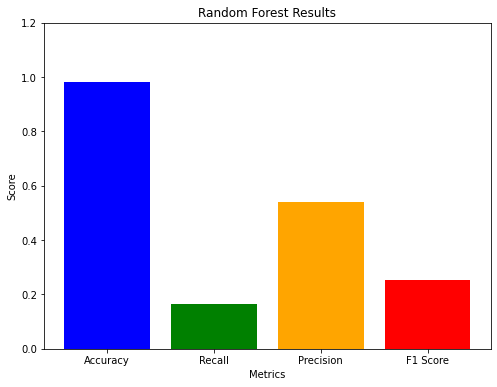

In [1]:
import matplotlib.pyplot as plt

# Random Forest Results
accuracy = 0.9823807477438762
recall = 0.16666666666666666
precision = 0.5384615384615384
f1_score = 0.2545454545454545

# Metrics and corresponding labels
metrics = [accuracy, recall, precision, f1_score]
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.2)  # Set the y-axis limit between 0 and 1.2
plt.title('Random Forest Results')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import xgboost as xgb

# Select the relevant columns from the dataset
columns = [
    'dim_session_number', 'dim_user_agent', 'dim_device_app_combo',
    'did_search', 'sent_message', 'sent_booking_request',
    'next_dim_session_number', 'next_dim_user_agent', 'next_dim_device_app_combo',
    'next_did_search', 'next_sent_message', 'next_sent_booking_request'
]
data_subset = data[columns]

# Encode categorical features using label encoding
label_encoder = LabelEncoder()
categorical_features = ['dim_user_agent', 'dim_device_app_combo', 'next_dim_user_agent', 'next_dim_device_app_combo']
for feature in categorical_features:
    data_subset[feature] = label_encoder.fit_transform(data_subset[feature])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_subset = pd.DataFrame(imputer.fit_transform(data_subset), columns=data_subset.columns)

# Separate features and target variable
X = data_subset.drop('sent_booking_request', axis=1)
y = data_subset['sent_booking_request']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)

# Print the evaluation metrics
print("XGBoost Results:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


C:\Users\sharm\AppData\Local\Temp\ipykernel_21076\2569134621.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[feature] = label_encoder.fit_transform(data_subset[feature])


XGBoost Results:
Accuracy: 0.9806617963042544
Recall: 0.19047619047619047
Precision: 0.42105263157894735
F1 Score: 0.26229508196721313


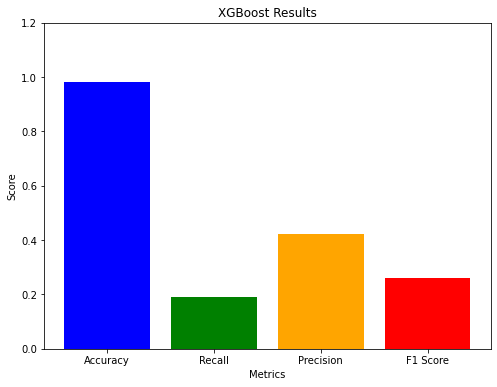

In [2]:
# XGBoost Results
accuracy = 0.9806617963042544
recall = 0.19047619047619047
precision = 0.42105263157894735
f1_score = 0.26229508196721313

# Metrics and corresponding labels
metrics = [accuracy, recall, precision, f1_score]
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.2)  # Set the y-axis limit between 0 and 1.2
plt.title('XGBoost Results')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


Based on these observations, it is difficult to definitively determine which algorithm is better without additional 
information about the specific requirements of the problem. It ultimately depends on the trade-off between accuracy, recall,
precision, and the specific needs of the application. Further analysis and consideration of the specific problem domain 
would be necessary to make a conclusive decision on which algorithm is more suitable.


Applications

Predicting user behavior and booking patterns
Understanding user preferences based on device and browser choices
Analyzing the impact of search activities and messaging on bookings
Identifying factors that contribute to successful booking requests
